In [1]:
import torch

import matplotlib
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
initial_data = torch.load("data/initial_rocket_data.pt")
num_initial_points = initial_data["num_initial_points"]
tkwargs = initial_data["tkwargs"]

num_iterations = 60
algos = ["sobol", "nsga2", "nparego", "nehvi", "pfes", "jes", "mars", "str_hvi_ucb"]
t = torch.linspace(
    num_initial_points,
    num_iterations + num_initial_points,
    num_iterations + 1,
    **tkwargs
)

best_data = torch.load("data/pareto_rocket_data.pt")
max_hv = best_data["best_hypervolume"]

labels = {
    "sobol": "Sobol",
    "nsga2": "NSGA2",
    "nparego": "NParEGO",
    "nehvi": "NEHVI",
    "pfes": "PFES",
    "jes": "JES",
    "mars": "MARS",
    "str_hvi_ucb": "STR-HVI-UCB",
}

colors = {
    "sobol": "k",
    "nsga2": "dodgerblue",
    "nparego": "orange",
    "nehvi": "mediumseagreen",
    "pfes": "crimson",
    "jes": "chocolate",
    "mars": "steelblue",
    "str_hvi_ucb": "hotpink",
}

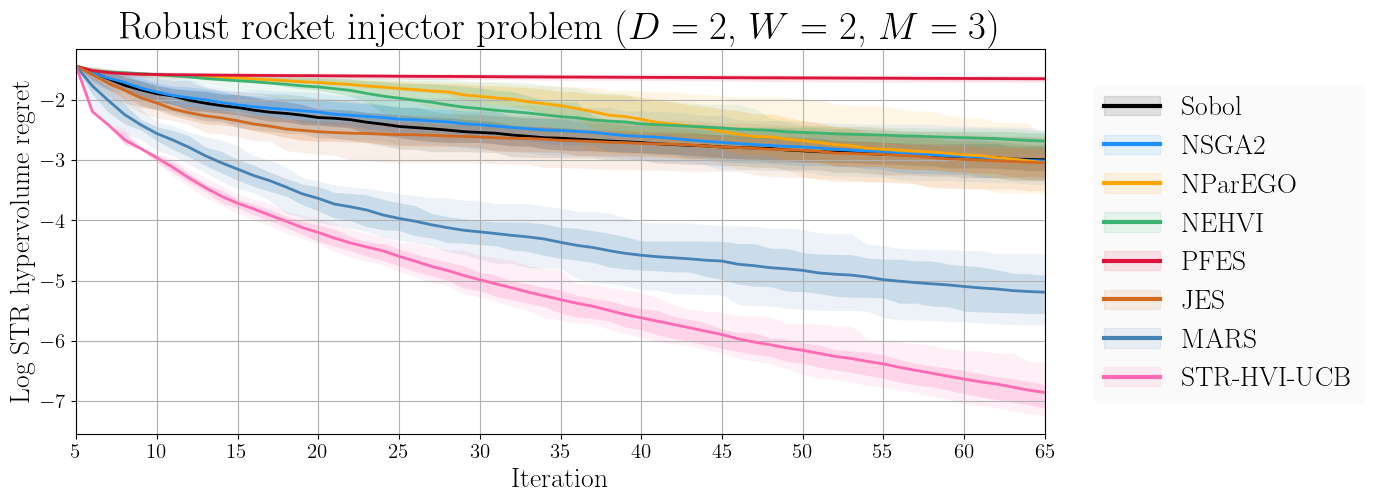

In [3]:
fig = plt.figure(figsize=(12.5, 5))
for algo in algos:

    data = torch.load(f"data/rocket_cvar_data_{algo}.pt")
    utilities = data["utilities"]
    algo_utils = torch.log(max_hv - utilities[:70])
    mean_performance = algo_utils.mean(dim=0)
    upper_performance = algo_utils.quantile(0.9, dim=0)
    lower_performance = algo_utils.quantile(0.1, dim=0)
    uq_performance = algo_utils.quantile(0.75, dim=0)
    lq_performance = algo_utils.quantile(0.25, dim=0)

    plt.plot(t, mean_performance, label=algo, color=colors[algo], linewidth=2)
    plt.fill_between(
        t, uq_performance, lq_performance, color=colors[algo], alpha=0.2, linewidth=0
    )
    plt.fill_between(
        t,
        upper_performance,
        lower_performance,
        color=colors[algo],
        alpha=0.1,
        linewidth=0,
    )

plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65], fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.xlim(5, 65)
plt.xlabel("Iteration", fontsize=20)
plt.ylabel("Log STR hypervolume regret", fontsize=20)
plt.title(r"Robust rocket injector problem ($D=2$, $W=2$, $M=3$)", fontsize=28)
####################################################################################################
# Legend.

handles = []
titles = []

for algo in algos:

    line = mlines.Line2D(
        [],
        [],
        color=colors[algo],
        linestyle="-",
        linewidth=3,
    )

    patch = mpatches.Patch(
        color=colors[algo],
        alpha=0.1,
    )

    handles.append((line, patch))
    titles.append(labels[algo])

plt.legend(
    handles=handles,
    labels=titles,
    loc=(1.05, 0.08),
    ncol=1,
    fontsize=20,
    facecolor="k",
    framealpha=0.02,
)
plt.show()